### Time Series Analysis

#### TSA Decomposition

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

%matplotlib ipympl
import matplotlib.pyplot as plt
from matplotlib import dates
import seaborn as sns

import joblib

# import bamboolib as bam

import plotly.graph_objects as go
from tkinter import *
import dtale as dt
# import glob
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.api import ExponentialSmoothing

from sklearn import metrics
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', '{:,.6}'.format)
# pd.set_option('max_columns', 100)

#? Import for plotly visualizations, too?

/home/fqp/anaconda3/envs/s1_v3/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
# Standard imports 
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, output_file, save

from bokeh.models.tools import HoverTool
from bokeh.models import Legend, ColumnDataSource, Range1d
output_notebook()

Loading BokehJS ...

### Loading the Data

In [ ]:
# df = joblib.load("/home/fqp/Documents/0 Study/3 Projects/s5_SQL_Flask_RapidsAI/data_prio/GTMA Trades_df1A")
# df.head(4)

In [3]:
df_enr = joblib.load("./data/GTMA Trades_df_enr")
df_sys = joblib.load("./data/GTMA Trades_df_sys")

### 1. STL of System Trades

#### Resampled Daily

In [4]:

#Todo: Set Index first
dt_enr = dt.show(df_enr, drop_index=True) 
# dt_enr

In [5]:
df_sys_D = df_sys.set_index(['End Time_D&T'])[['Cost']].resample('D').sum()
# df_enr_D.head(6)

In [ ]:

#? Standby to .dump
# joblib.dump(df_enr_D,"./data/GTMA Trades_df_enr_D")

2022-07-19 11:20:12,664 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-07-19 11:20:12,907 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
2022-07-19 11:20:13,056 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


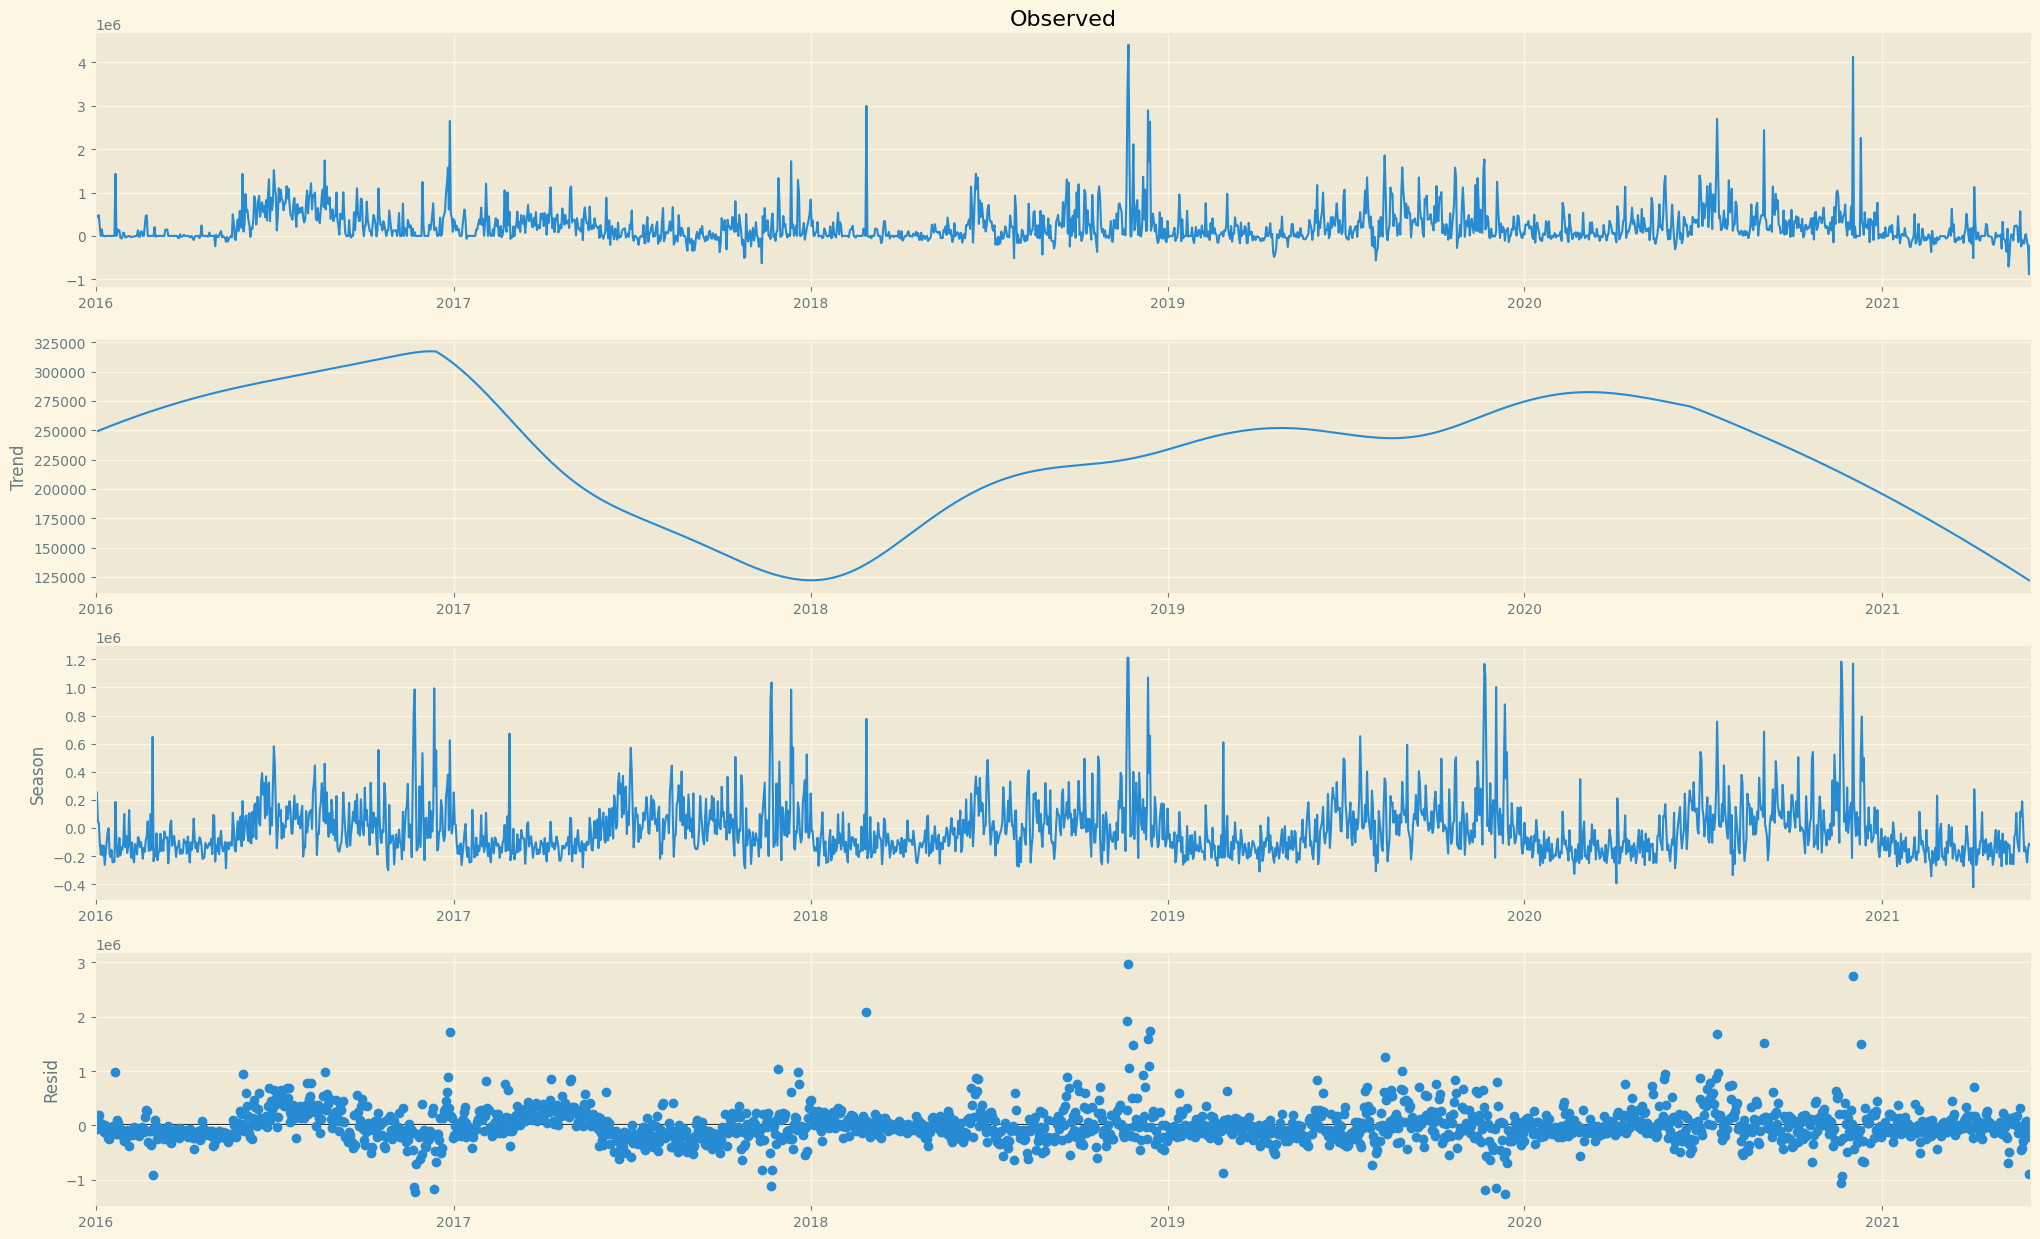

In [6]:

#* from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'

stlplot_sysD = STL(df_sys_D, period=365, seasonal_deg=0).fit()
stlplot_sysD.plot()

$\qquad$ Replotting with with plotly.graph_objects [go]

In [40]:

#? Necessary for plotting with plotly.graph_objects
stlplot_sysD.observed.reset_index(inplace=True)

In [41]:


layout = go.Layout(
margin=go.layout.Margin(
        l=20, #left margin
        r=15, #right margin
        b=15, #bottom margin
        t=35, #top margin
                        ), xaxis_title="Date", yaxis_title="Cost (£)",
                    )

fig = go.Figure(data=go.Scatter(x=stlplot_sysD.observed["End Time_D&T"], y=stlplot_sysD.observed["Cost"]), 
                layout=layout)
fig.update_layout(title="System Trades [Daily] -- Observed")
fig.show()
for i, t in zip([stlplot_sysD.trend, stlplot_sysD.seasonal, stlplot_sysD.resid],["Trend","Seasonal","Residuals"]):
    # title = f"System Trades [Daily] -- {t}"
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"System Trades [Daily] -- {t}")
    fig.show()
    
    
#! Unnecessary
#  font=dict(
#         family="Courier New, monospace",
#         # size=18,
#         color="RebeccaPurple"
#     )

$\qquad$ $\qquad$ Trying with Bokeh

In [ ]:
data, titles = [stlplot_sysD.trend, stlplot_sysD.seasonal, stlplot_sysD.resid], ["Trend","Seasonal","Residuals"]

for i,title in zip(data, titles):
    
    # p = figure()
    
    p = figure(title=title, x_axis_label='Date', y_axis_label='Cost',x_axis_type="datetime", plot_width=1500, plot_height=750, tools=[HoverTool()],
    tooltips="@x \n\n @y",
    sizing_mode="stretch_width")
    p.line(i.index, i.values, line_width=2)
    p.toolbar.autohide = True
    # legend_label="Temp."
    #? Config
    # p.legend.location = "top_left"
    # p.legend.title = "Obervations"
    
    show(p)

-------------------------

#### Resampling System Trade to Monthly frequency

In [4]:
df_sys_M = df_sys.set_index(['End Time_D&T'])[['Cost']].resample('M').sum()
# df_sys_M.head(4)


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


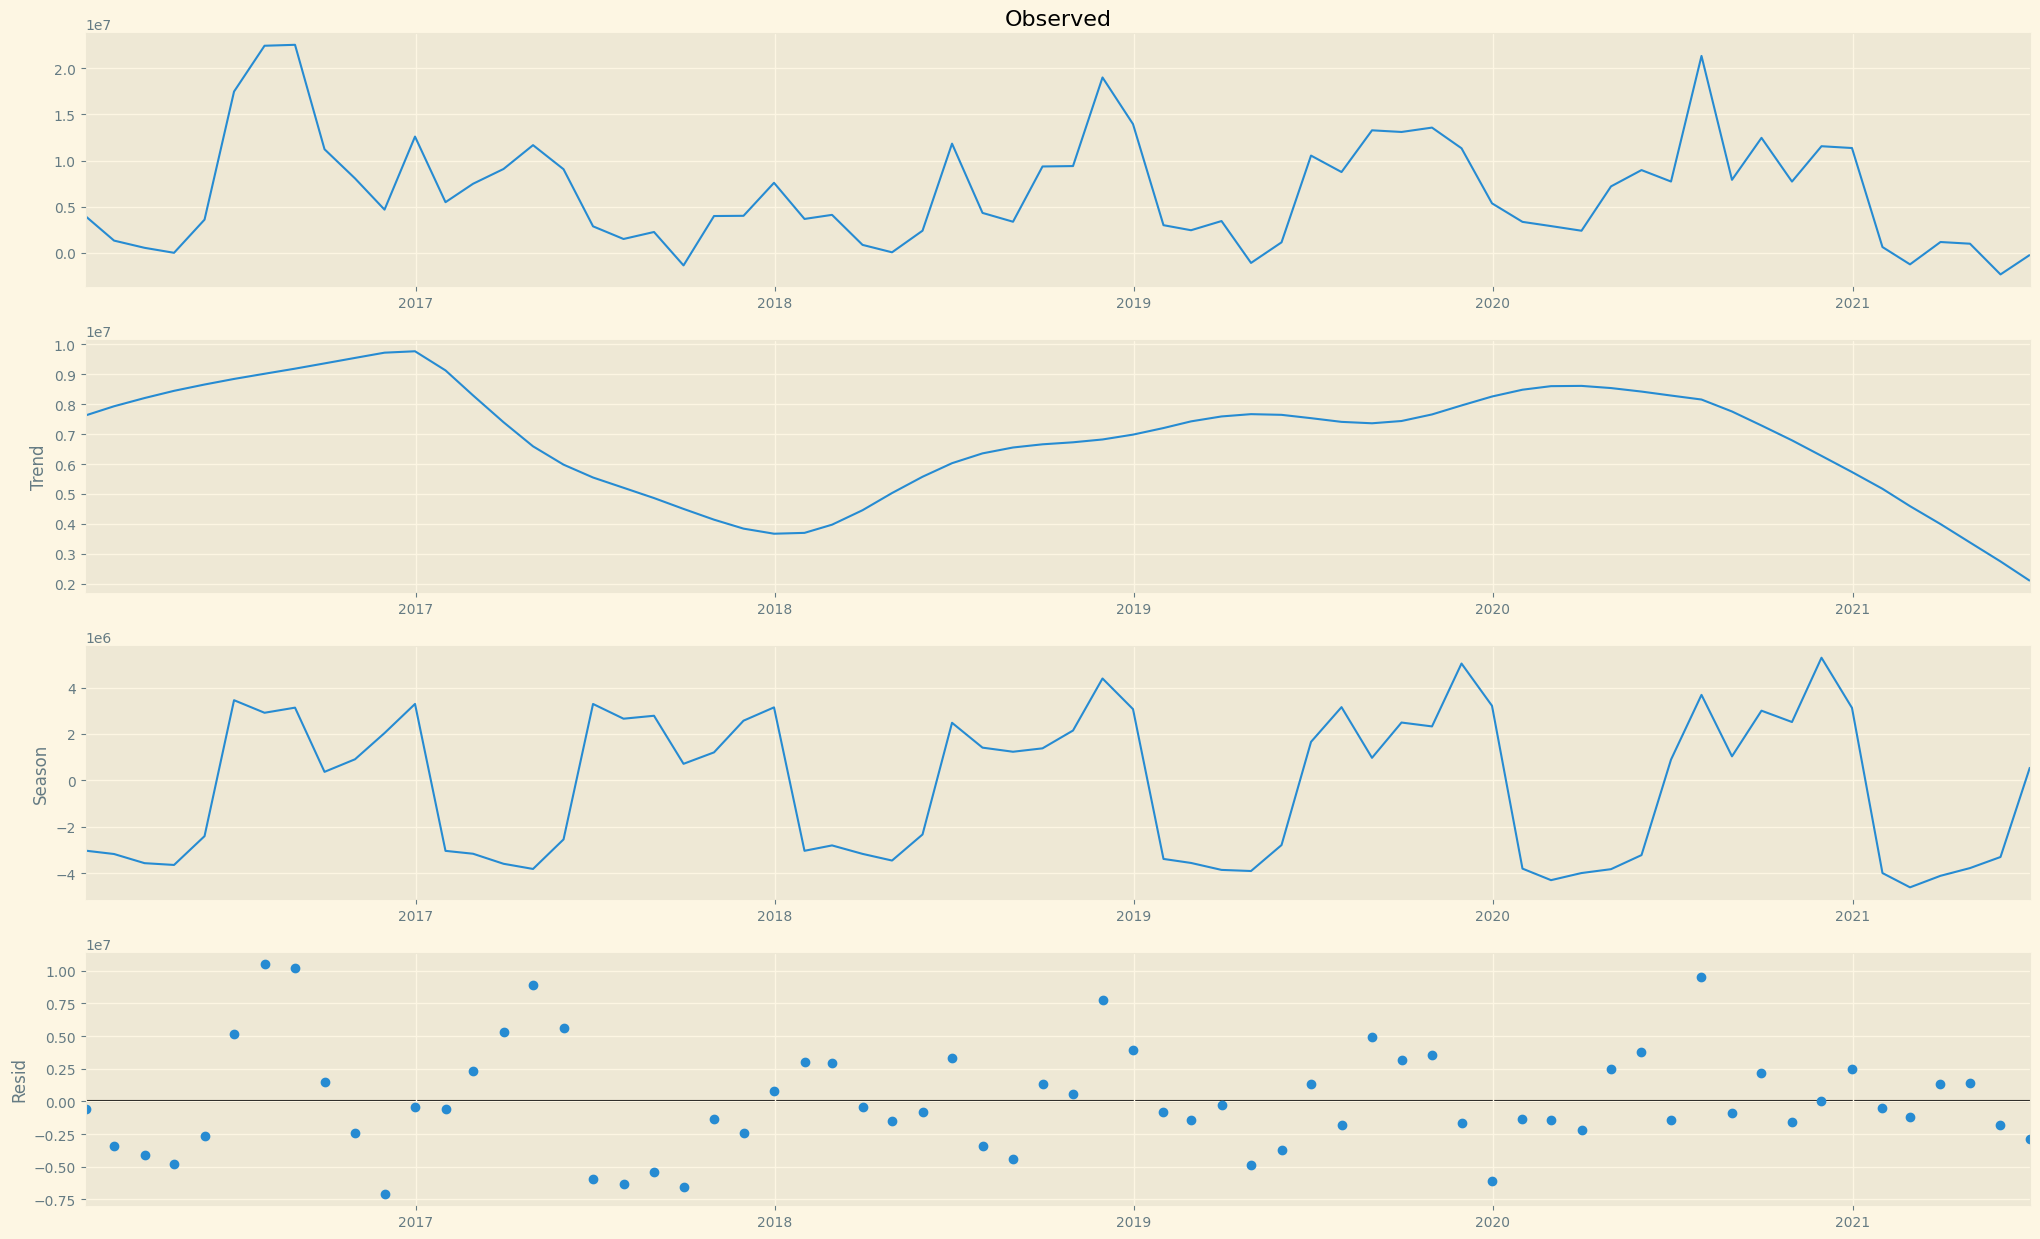

In [5]:
# df_enr_D.reset_index(inplace=True)

plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'
# ,,,seasonal_deg=1
stlplot_sysM = STL(df_sys_M,period=12, seasonal_deg=0).fit()
stlplot_sysM.plot()
# plt.show()

In [38]:
stlplot_sysM.observed.reset_index(inplace=True)

In [42]:

#? No need to re-execute the 'layout' cdoe from the top.

fig = go.Figure(data=go.Scatter(x=stlplot_sysM.observed["End Time_D&T"], y=stlplot_sysM.observed["Cost"]), layout=layout)
fig.update_layout(title="System Trades [Monthly] -- Observed")
fig.show()
for i,t in zip([stlplot_sysM.trend, stlplot_sysM.seasonal, stlplot_sysM.resid],["Trend","Seasonal","Residuals"]):
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"System Trades [Monthly] -- {t}")
    fig.show()

##### Anomaly Detection through Residuals Analysis

In [20]:
sys_res_mu = stlplot_sysM.resid.mean()
sys_res_std = stlplot_sysM.resid.std()

# lower = sys_res_mu - 1.5*sys_res_std
# upper = sys_res_mu + 1.5*sys_res_std

mild_lower = sys_res_mu - 1.5*sys_res_std
mild_upper = sys_res_mu + 1.5*sys_res_std

extr_lower = sys_res_mu - 3*sys_res_std
extr_upper = sys_res_mu + 3*sys_res_std

In [53]:

#? GO
fig = go.Figure(data=go.Scatter(x=stlplot_sysM.resid.index, y=stlplot_sysM.resid.values), layout=layout)
fig.update_layout(title="Residuals of System Trades [Monthly]")
fig.add_hrect(y0=mild_lower, y1=mild_upper, line_width=0, fillcolor="green", opacity=0.2)
fig.add_hline(y=extr_upper, line_width=2, line_dash="dash", line_color="red",opacity=0.5)
fig.add_hline(y=extr_lower, line_width=2, line_dash="dash", line_color="red",opacity=0.5)


fig.show()

In [ ]:

#? Plotting any anomalies
# anomalies = df3a_d["Cost"][(stl_df3a.resid < lower) | (stl_df3a.resid > upper)]

### 2. STL of Energy Trades

In [14]:

df_enr_D = df_enr.set_index(['End Time_D&T'])[['Cost']].resample('D').sum()

In [ ]:
# df_enr_D.reset_index(inplace=True)

plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'
# ,,,seasonal_deg=1
stlplot_enrD = STL(df_enr_D,period=365, seasonal_deg=1).fit()
stlplot_enrD.plot()
# plt.show()

In [17]:
stlplot_enrD.observed.reset_index(inplace=True)

In [ ]:
fig = go.Figure(data=go.Scatter(x=stlplot_enrD.observed["End Time_D&T"], y=stlplot_enrD.observed["Cost"]), 
                layout=layout)
fig.update_layout(title="Energy Trades [Daily] -- Observed")
fig.show()
for i, t in zip([stlplot_enrD.trend, stlplot_enrD.seasonal, stlplot_enrD.resid],["Trend","Seasonal","Residuals"]):
    # title = f"System Trades [Daily] -- {t}"
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"Energy Trades [Daily] -- {t}")
    fig.show()

#### Resampling Energy Trades to Monthly Frequency

In [6]:
df_enr_M = df_enr.set_index(['End Time_D&T'])[['Cost']].resample('M').sum()

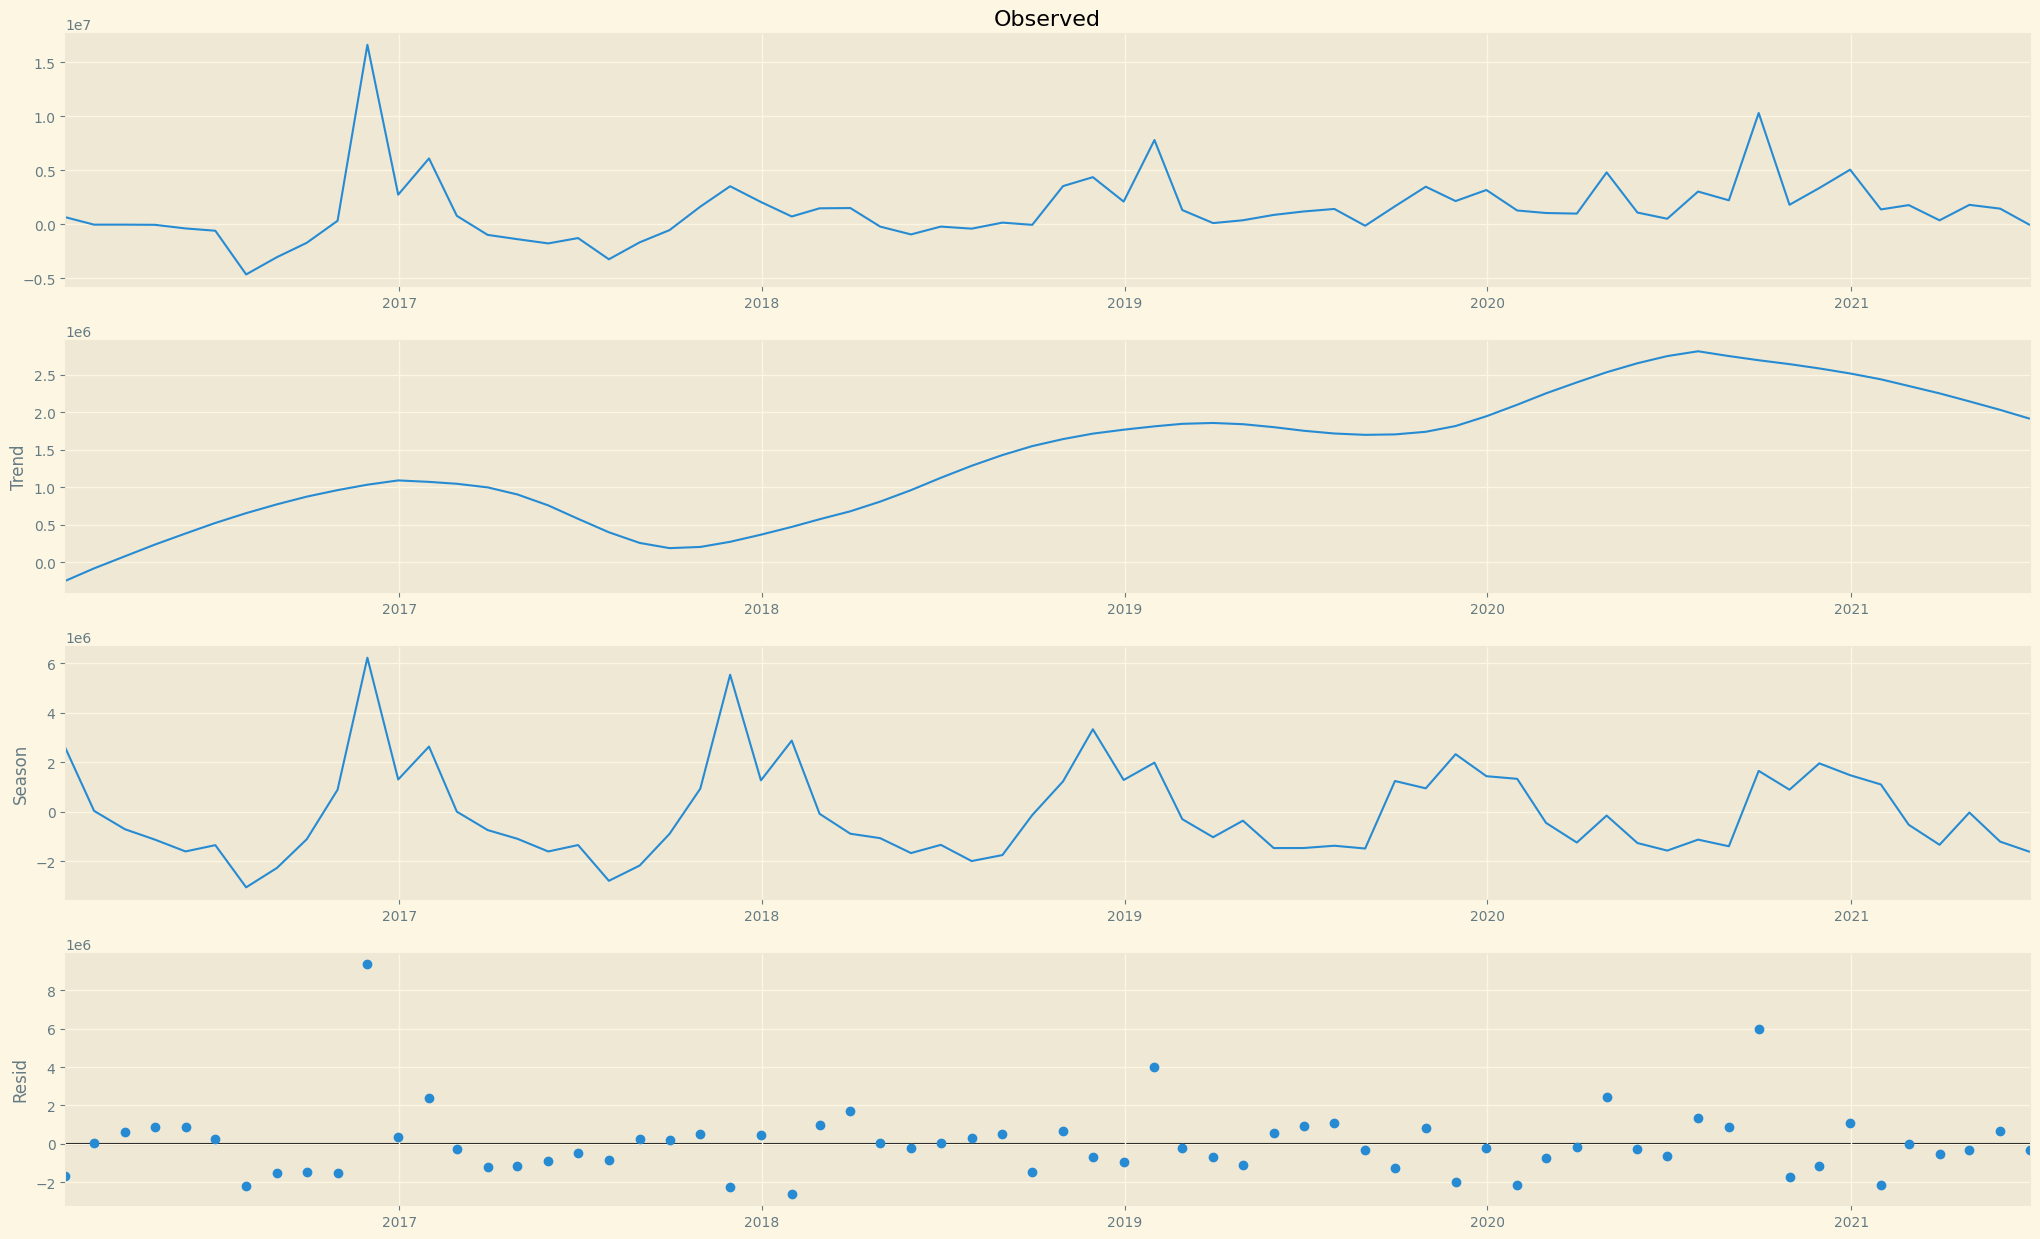

In [8]:
plt.rcParams["figure.figsize"]=[20.5,12.5]
plt.rcParams["figure.autolayout"]=True
plt.style.use('Solarize_Light2')

plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['lines.color'] = 'green'

stlplot_enrM = STL(df_enr_M,period=12, seasonal_deg=0,).fit()
stlplot_enrM.plot()

Plotting Energy Trades [Monthly] in plotly.graph_objects 

In [9]:

#? Reformatting the .observed component, as neccessary
stlplot_enrM.observed.reset_index(inplace=True)

In [10]:
layout = go.Layout(
margin=go.layout.Margin(
        l=20, #left margin
        r=15, #right margin
        b=15, #bottom margin
        t=35, #top margin
                        ), xaxis_title="Date", yaxis_title="Cost (£)",
                    )

fig = go.Figure(data=go.Scatter(x=stlplot_enrM.observed["End Time_D&T"], y=stlplot_enrM.observed["Cost"]), 
                layout=layout)
fig.update_layout(title="Energy Trades [Monthly] -- Observed")
fig.show()
for i, t in zip([stlplot_enrM.trend, stlplot_enrM.seasonal, stlplot_enrM.resid],["Trend","Seasonal","Residuals"]):
    # title = f"System Trades [Daily] -- {t}"
    fig = go.Figure(data=go.Scatter(x=i.index, y=i.values), layout=layout)
    fig.update_layout(title=f"Energy Trades [Monthly] -- {t}")
    fig.show()

Reference for the "record growth of suppliers," which is hypothesized to be one of the causes of the change in Energy Trades' landscape.
https://assets.kpmg/content/dam/kpmg/uk/pdf/2018/01/a-turning-point-for-uk-retail-energy.pdf

#### Anomaly Detection through Residuals Analysis

In [11]:
enr_res_mu = stlplot_enrM.resid.mean()
enr_res_std = stlplot_enrM.resid.std()

# lower = sys_res_mu - 1.5*sys_res_std
# upper = sys_res_mu + 1.5*sys_res_std

mild_lower = enr_res_mu - 1.5*enr_res_std
mild_upper = enr_res_mu + 1.5*enr_res_std

extr_lower = enr_res_mu - 3*enr_res_std
extr_upper = enr_res_mu + 3*enr_res_std

fig = go.Figure(data=go.Scatter(x=stlplot_enrM.resid.index, y=stlplot_enrM.resid.values), layout=layout)
fig.update_layout(title="Residuals of Energy Trades [Monthly]")
fig.add_hrect(y0=mild_lower, y1=mild_upper, line_width=0, fillcolor="green", opacity=0.2)
fig.add_hline(y=extr_upper, line_width=2, line_dash="dash", line_color="red",opacity=0.5)
fig.add_hline(y=extr_lower, line_width=2, line_dash="dash", line_color="red",opacity=0.5)


fig.show()

Nov. 2016 as a notable period for having outliers for both System Trades (Mild outlier) & and Energy Trades (Extreme Outlier).

### Trends Overlay

In [12]:

#? dictionary from the above series
trend_dict = {
    "System Trades -- Monthly" : pd.Series(stlplot_sysM.trend.values[:], index=stlplot_sysM.trend.index),
    "Energy Trades -- Monthly" : pd.Series(stlplot_enrM.trend.values[:], index=stlplot_sysM.trend.index)
            } 

trendplot_enr_sysM = pd.DataFrame(trend_dict)
trendplot_enr_sysM.reset_index(inplace=True)

# trendplot_enr_sys.head(6)

In [30]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=trendplot_enr_sysM["End Time_D&T"], y=trendplot_enr_sysM["System Trades -- Monthly"],
                    mode='lines', name='Trend -- System Trades'
                    ))
fig.add_trace(go.Scatter(x=trendplot_enr_sysM["End Time_D&T"], y=trendplot_enr_sysM["Energy Trades -- Monthly"],
                    mode='lines',
                    name='Trend -- Energy Trades'))

fig.show()


In [13]:
dt_tsa_ES_M = dt.show(trendplot_enr_sysM, ignore_index=True, open_browser=True)
dt_tsa_ES_M

In [ ]:

#* Exported Code from dtale

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler()
standardized = transformer.fit_transform(data[['System Trades -- Monthly']]).reshape(-1)
df.loc[:, 'System Trades -- Monthly_robust'] = pd.Series(standardized, index=data.index, name='System Trades -- Monthly_robust')

standardized = transformer.fit_transform(data[['Energy Trades -- Monthly']]).reshape(-1)
df.loc[:, 'Energy Trades -- Monthly_robust'] = pd.Series(standardized, index=data.index, name='Energy Trades -- Monthly_robust')
chart_data = pd.concat([
	df['End Time_D&T'],
	df['System Trades -- Monthly_robust'],
	df['Energy Trades -- Monthly_robust'],
], axis=1)
chart_data = chart_data.sort_values(['End Time_D&T'])
chart_data = chart_data.rename(columns={'End Time_D&T': 'x'})
chart_data = chart_data.dropna()

# import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['System Trades -- Monthly_robust'], name='System Trades -- Monthly_robust', **line_cfg
))
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['Energy Trades -- Monthly_robust'], name='Energy Trades -- Monthly_robust', yaxis='y2', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'System Trades -- Monthly_robust, Energy Trades -- Monthly_robust by End Time_D&T'},
    'xaxis': {'title': {'text': 'End Time_D&T'}},
    'yaxis': {'title': {'text': 'System Trades -- Monthly_robust, Energy Trades -- Monthly_robust'}, 'type': 'linear'}
}))

### Appendix

#### Filters from DTale

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.filters.bk_filter import bkfilter
from statsmodels.tsa.filters.cf_filter import cffilter

#* Hodrick-Prescott, Annual
s = df3.groupby('Start Time_D&T')['Cost'].sum()
cycle, trend = hpfilter(s, lamb=6.25)

#* Baxter-King, Annual
bk = df3.groupby('Start Time_D&T')['Cost'].sum()
cycle = bkfilter(s, 1.5, 8, 12)

#* Cristian-Fitzgerald, Annual
cf = df3.groupby('Start Time_D&T')['Cost'].sum()
cycle = cffilter(s, 1.5, 8, True)


### References
1. https://www.ofgem.gov.uk/sites/default/files/docs/2019/11/20191030_state_of_energy_market_revised.pdf
2. https://www.forbes.com/sites/gauravsharma/2019/01/27/why-independent-u-k-energy-suppliers-are-collapsing-at-an-alarming-rate/?sh=6b740d8211d4
3. https://www.bbc.com/news/business-54914410
4. https://www.imperial.ac.uk/energy-futures-lab/reports/briefing-papers/paper-7/ 